# Titanic Dataset Analysis and Modeling

## Author: Olatunji Israel Olayemi



## Introduction

The Titanic dataset is one of the most well known datasets in the field of data science and machine learning. It captures detailed information about the passengers aboard the RMS Titanic, which tragically sank on April 15, 1912. This dataset provides an opportunity to analyze factors that influenced survival rates and build predictive models based on passenger features such as age, sex, fare, and class. The goal of this project is to explore the dataset, perform exploratory data analysis (EDA), clean the data, and develop a machine learning model to predict passenger survival.

The analysis offers insights into patterns and trends among passengers and showcases data preprocessing techniques and the application of logistic regression for classification. This project demonstrates data handling, visualization, and model building skills that are critical for data science and machine learning professionals.



# Objectives of the Titanic Dataset Analysis

The primary objectives of this project are as follows:

- To explore and analyze the Titanic dataset to uncover patterns, trends, and relationships between passenger attributes and survival outcomes.

- To visualize the impact of features such as age, gender, class, and fare on survival rates.

- To clean and preprocess the dataset by handling missing values and removing irrelevant or redundant features.

- To prepare the data for modeling by standardizing numerical features and encoding categorical variables.

- To build a logistic regression model that predicts passenger survival based on the selected features.

- To evaluate the model's performance using metrics such as accuracy, confusion matrix, and classification report.

- To validate the significance of features using logistic regression analysis in Statsmodels.

- To interpret the statistical summary and understand the influence of different variables on survival probability.

- To provide actionable insights derived from the analysis, emphasizing factors that had a significant impact on survival.

- To demonstrate end-to-end data analysis and machine learning workflows that can be applied to similar classification problems.


This project not only focuses on answering questions about survival rates but also serves as a demonstration of practical data science skills, including data preprocessing, visualization, and model building.

In [2]:

## Importing Libraries

import pandas as pd  

import numpy as np

import matplotlib.pyplot as plt

from pandas import DataFrame, Series

import seaborn as sns

from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression 

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.tools.tools import add_constant



# 1. Data Loading and Initial Inspection



In [3]:
## Load The Dataset

df = pd.read_csv("C:/Users/USER/Desktop/titanicdataset.csv")
print(df)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...



# Inspecting the data



In [4]:
## Data shape

print("The number for row:", df.shape[0])

print("The number for column:", df.shape[1])

The number for row: 418
The number for column: 12


In [5]:
### Checking for data info


print("The data informations are:", df.info)

The data informations are: <bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1  



# 2. Data Cleaning and Preprocessing



In [6]:
#Check and handle missing values

missing_values = df.isnull().sum()

In [7]:
#### Print the missing values for each column

print(missing_values)

#### Check if there are any missing values in the entire dataset

if missing_values.sum() == 0:
    print("No missing values in the dataset.")
else:
    print("There are missing values in the dataset.")


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
There are missing values in the dataset.


In [8]:
# Drop columns with high missing values

df.drop('Cabin', axis =1, inplace=True)

print(df.isna().sum())

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64


In [9]:
# Fill missing values in the 'Age' column with the mean

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [10]:
print(df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


In [11]:
# Fill missing values in the 'Fare' column with the median

df['Fare'].fillna(df['Fare'].median(), inplace=True)



# Verify all missing values are handled



In [33]:
print(df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64




# 3. Exploratory Data Analysis (EDA)



In [34]:

### Descriptive Statistics

print(df.describe().T)

             count         mean         std     min       25%         50%  \
PassengerId  418.0  1100.500000  120.810458  892.00  996.2500  1100.50000   
Survived     418.0     0.363636    0.481622    0.00    0.0000     0.00000   
Pclass       418.0     2.265550    0.841838    1.00    1.0000     3.00000   
Age          418.0    30.272590   12.634534    0.17   23.0000    30.27259   
SibSp        418.0     0.447368    0.896760    0.00    0.0000     0.00000   
Parch        418.0     0.392344    0.981429    0.00    0.0000     0.00000   
Fare         418.0    35.576535   55.850103    0.00    7.8958    14.45420   

                     75%        max  
PassengerId  1204.750000  1309.0000  
Survived        1.000000     1.0000  
Pclass          3.000000     3.0000  
Age            35.750000    76.0000  
SibSp           1.000000     8.0000  
Parch           0.000000     9.0000  
Fare           31.471875   512.3292  


In [35]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


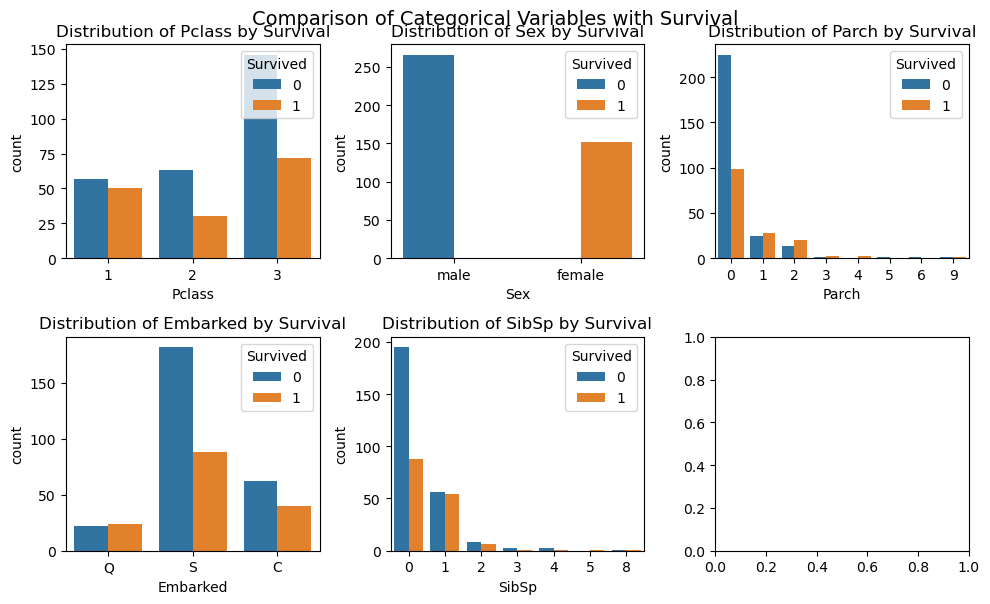

In [36]:
# Visualizing categorical variables against survival

categorical_variables = ['Pclass', 'Sex', 'Parch', 'Embarked', 'SibSp']

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

for i, categorical_variable in enumerate(categorical_variables):
    sns.countplot(x=categorical_variable, hue='Survived', data=df, ax=axes[i])
    axes[i].set_title(f"Distribution of {categorical_variable} by Survival", fontsize=12)
    axes[i].legend(title='Survived', fontsize=10, loc='upper right') 

plt.tight_layout()

fig.suptitle("Comparison of Categorical Variables with Survival", fontsize=14, y=1)
plt.show()

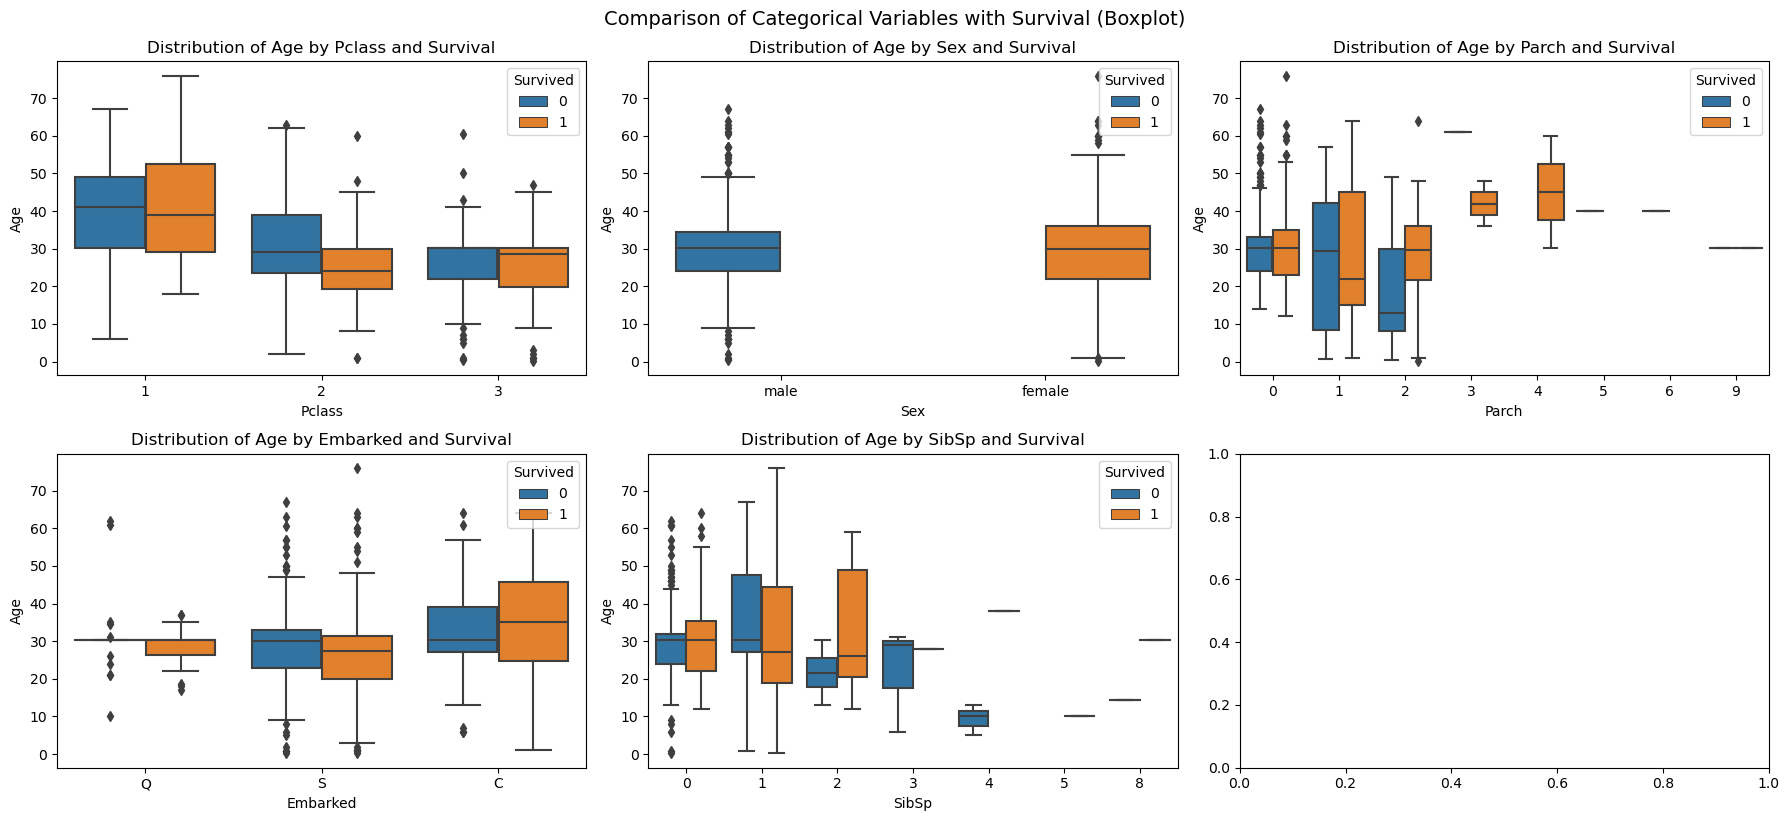

In [37]:
# Boxplot: Age distribution across categorical variables and survival

categorical_variables = ['Pclass', 'Sex', 'Parch', 'Embarked', 'SibSp']

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()
for i, categorical_variable in enumerate(categorical_variables):
    sns.boxplot(x=categorical_variable, y='Age', hue='Survived', data=df, ax=axes[i])
    axes[i].set_title(f"Distribution of Age by {categorical_variable} and Survival", fontsize=12)
    axes[i].legend(title='Survived', fontsize=10, loc='upper right')  

plt.tight_layout()

fig.suptitle("Comparison of Categorical Variables with Survival (Boxplot)", fontsize=14, y=1.02)

plt.show()

          Age      Fare
0    34.50000    7.8292
1    47.00000    7.0000
2    62.00000    9.6875
3    27.00000    8.6625
4    22.00000   12.2875
..        ...       ...
413  30.27259    8.0500
414  39.00000  108.9000
415  38.50000    7.2500
416  30.27259    8.0500
417  30.27259   22.3583

[418 rows x 2 columns]


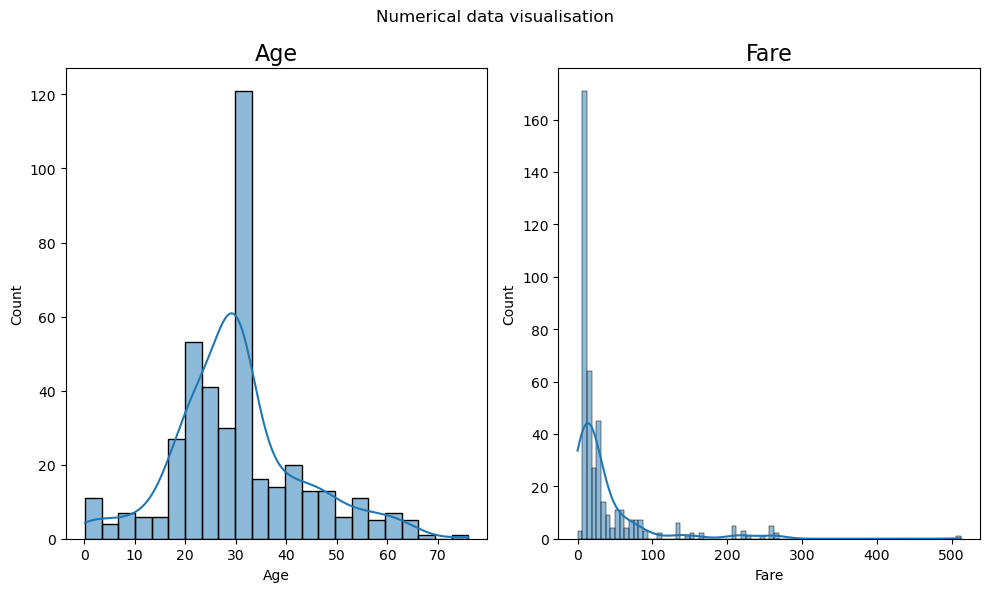

In [38]:
# Histogram for numerical data

numerical_data= df[['Age','Fare',]]
print(numerical_data)

fig, ax = plt.subplots(1,2, figsize= (10,6))
fig.suptitle("Numerical data visualisation")
for i,col in enumerate(numerical_data.columns):
    axs=ax[i%3]
    sns.histplot(x=df[col],ax=axs, kde=True)
    axs.set_title(col, fontsize=16)
    plt.tight_layout()
plt.show()



# 4. Model Building



In [15]:

# Selecting features and target variable

X= df[['Age','Pclass','Fare']]
y= df['Survived']

# Splitting the dataset

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3,
                                                   random_state=42)


# LOGISTIC REGRESSION MODEL
model= LogisticRegression(random_state=42)

#Train the model
model.fit(X_train, y_train)

# Make prediction
y_pred = model.predict(X_test)


# 5. Model Evaluation

In [16]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
target_names =['Survived', 'Not survived']

# Confusion Matrix and Classification Report

print(metrics.confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred,target_names = target_names))
X_train_sm = sm.add_constant(X_train)

#Fit the model
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Summary of the logistic regression model

print(result.summary())

Accuracy: 0.6666666666666666
[[80  5]
 [37  4]]
Classification Report:
               precision    recall  f1-score   support

    Survived       0.68      0.94      0.79        85
Not survived       0.44      0.10      0.16        41

    accuracy                           0.67       126
   macro avg       0.56      0.52      0.48       126
weighted avg       0.61      0.67      0.59       126

Optimization terminated successfully.
         Current function value: 0.642592
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  292
Model:                          Logit   Df Residuals:                      288
Method:                           MLE   Df Model:                            3
Date:                Sat, 21 Dec 2024   Pseudo R-squ.:                 0.03243
Time:                        14:20:32   Log-Likelihood:                -187.64
converged:               

# Interpretation

1. The model achieved an accuracy of 66.7%. This indicates the proportion of correctly classified instances relative to the total number of instances is slightly above average​.

2. Precision and recall for "Survived" (positive class) were 0.68 and 0.94, respectively, suggesting the model identified the majority of true positives but included some false positives.

3. For "Not Survived" (negative class), the precision was 0.44, and recall was 0.10, indicating significant room for improvement in identifying this class​.

4. From logistic regression results, the variable "Fare" positively correlated with survival, with a p-value of 0.04 indicating statistical significance.
5. Other variables like "Age" and "Pclass" were not statistically significant predictors within this model (p > 0.05)​.

# Recommendations

1. Explore additional features or interactions (e.g., family size, cabin location, etc.) to improve model performance.

2. Conduct deeper analysis of missing data and scale continuous variables like "Fare" for better interpretability.

# Conclusion

The model provides a basic predictive framework for Titanic survival but has limitations in distinguishing between survival classes effectively, especially for "Not Survived." The low pseudo R-squared and recall for "Not Survived" highlight areas for improvement.

